# Exercício - Árvores de Decisão

Neste exercício você irá colocar em prática seus conhecimentos em classificação com árvores de decisão utilizando o scikit-learn. Você irá o dataset disponível em: https://www.kaggle.com/ronitf/heart-disease-uci.

Baseando-se no tutorial apresentado em sala de aula, realize as seguintes tarefas:

1 - Carregue o dataset. 
2 - Faça um histograma dos atributos presentes no dataset (dica: utilize o método hist do matplotlib). O que você pode perceber analisando o histograma? Os dados seguem algum padrão na sua distribuição? O atributo classe é balanceado? 
3 - Divida o dataset em atributos (X) e classe (Y). 
4 - Divida o dataset em conjuntos de treino (80%) e teste (20%). 
5 - Crie e treine a sua árvore de decisão. 
6 - Faça predições utilizando a árvore criada. 
7 - Avalie o algoritmo do modo tradicional (usando os conjuntos de treino e teste) e utilizando o K-fold cross-validation. 
8 - Altere os valores da profundidade da árvore (max_depth) e da quantidade de samples para split (min_samples_split) na etapa de treinamento. 

Faça testes com diversos valores e avalie se existem quedas ou aumentos da acurácia após a alteração desses parâmetros. Não esqueça também de variar a quantidade de conjuntos (n_splits) na etapa do K-fold e avaliar quais são as mudanças na acurácia após as alterações.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed9277beb8>,
      dtype=object)

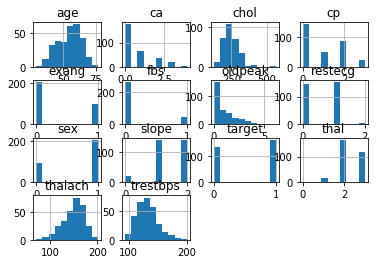

In [4]:
dataset.hist()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Divisão do dataset em atributos e classes

In [6]:
X = dataset.iloc[:,0:12]
Y = dataset.iloc[:,13]

### Divisão do dataset em treino e teste

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size= 0.2, random_state=0)

### Deifinição do modelo

In [74]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split= 20)

### Treinamento do modelo 

In [75]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predição utilizando o X_test

In [76]:
predicao = model.predict(X_test)

### Definição da acurácia

In [77]:
accuracy = model.score(X_test, y_test)*100
print('Accuracy: %s%%' % accuracy)

Accuracy: 72.1311475409836%


In [82]:
maxAccuracy = 0
valueI, valueJ = '', ''
for i in range(2, 20):
    for j in range(2, 20):

        model = DecisionTreeClassifier(criterion='gini', max_depth=i, min_samples_split= j)
        model.fit(X_train, y_train)
        predicao = model.predict(X_test)
        accuracy = model.score(X_test, y_test)*100
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            valueI, valueJ = i,j
print('I: {0}, J:{1} Accuracy: {2}%'.format(valueI, valueJ, maxAccuracy))

I: 3, J:2 Accuracy: 78.68852459016394%
